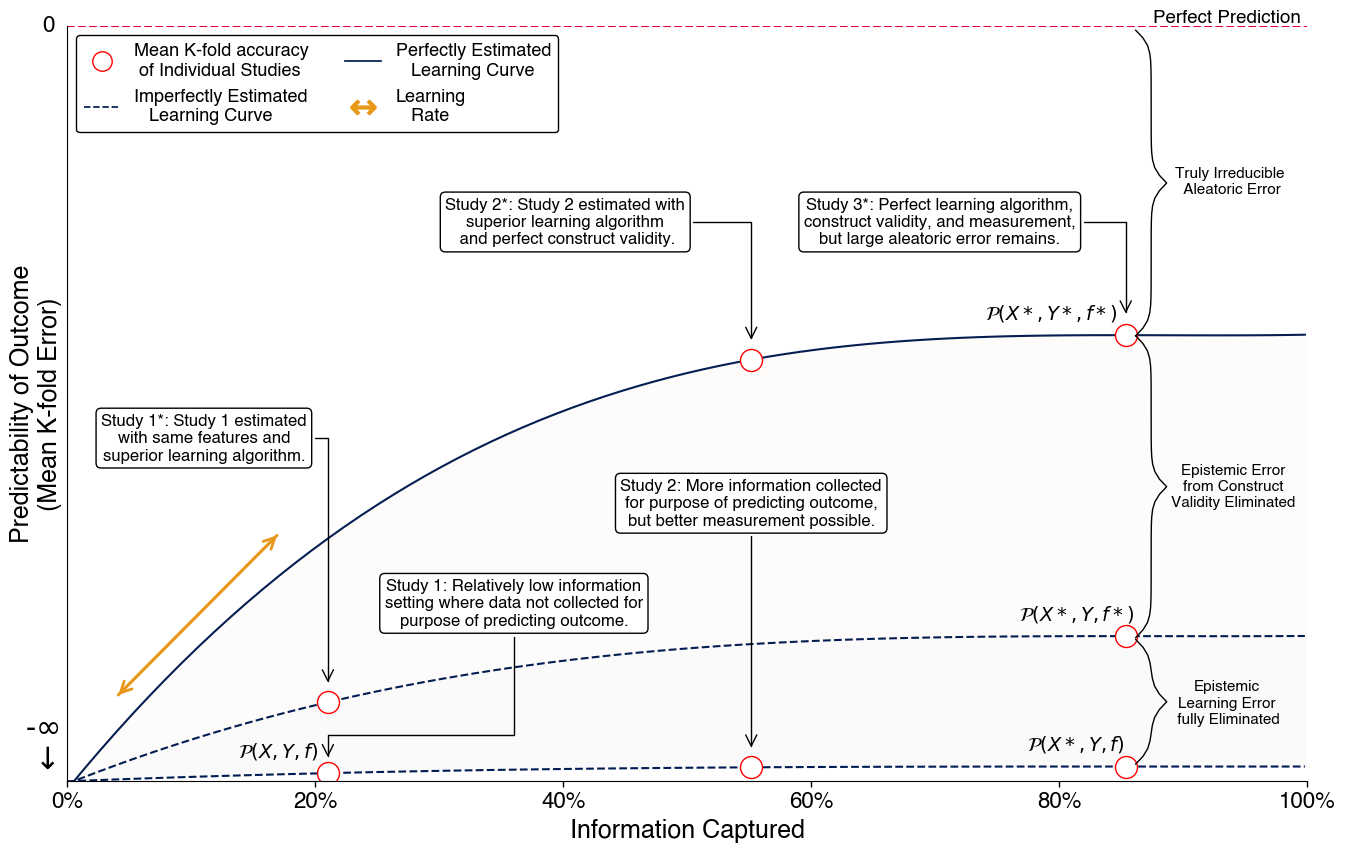

In [138]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from figure_helpers import draw_brace, polynomial_function
mpl.rcParams['font.family'] = 'Helvetica'
warnings.simplefilter("ignore", UserWarning)

fig, ax1 = plt.subplots(figsize=(16, 9.8))

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_data = np.array([0, 0.25, 0.5, 0.725, 0.825, 0.9, 0.95, .965, 0.98, 0.98, 0.9825, 1.025, 1.015])
degree = 4

y_data = y_data * 0.6
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='-', zorder=1)
#ax1.scatter(x1_fit[14], y1_fit[14], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[42], y1_fit[42], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
study2star = y1_fit[42]
bracket1_x = x1_fit[65]
bracket1_y1 = y1_fit[65]
y1_fill_fit = y1_fit
ax1.text(x1_fit[65]-.6, y1_fit[65]+.03, '$\mathcal{P} (X*, Y*, f*)$', ha='center', va='center', fontsize=14)

y_data = y_data * 0.325
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='--', zorder=1)
ax1.scatter(x1_fit[16], y1_fit[16], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
#ax1.scatter(x1_fit[35], y1_fit[35], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
bracket1_y2 = y1_fit[65]
study1star = y1_fit[16]
y2_fill_fit = y1_fit
ax1.text(x1_fit[65]-.4, y1_fit[65]+.03, '$\mathcal{P} (X*, Y, f*)$', ha='center', va='center', fontsize=14)


degree = 2
y_data = y_data * 0.1
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='--', zorder=1)
ax1.scatter(x1_fit[16], y1_fit[16], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[42], y1_fit[42], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
bracket1_y2 = y1_fit[65]
y3_fill_fit = y1_fit
ax1.text(x1_fit[16]-.4, y1_fit[16]+.03, '$\mathcal{P} (X, Y, f)$', ha='center', va='center', fontsize=14)
ax1.text(x1_fit[65]-.4, y1_fit[65]+.03, '$\mathcal{P} (X*, Y, f)$', ha='center', va='center', fontsize=14)




#ax1.set_title('a.', fontsize=20, loc='left')
#ax1.grid(which="both", linestyle='--', alpha=0.3)
ax1.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
ax1.axhline(y=1, color='#E4003B', linestyle='--', linewidth=1.5)
#ax1.axhline(y=y1_fit[16], xmin=x1_fit[16]-1.8825, xmax=x1_fit[35]-4.1275,
#            color='k', linestyle='--', linewidth=1)
ax1.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.set_ylabel('Predictability of Outcome\n(Mean K-fold Error)', fontsize=18)
ax1.set_xlabel('Information Captured', fontsize=18)    
ax1.set_xlim(0,10)


ax1.annotate(
    'Study 2: More information collected\nfor purpose of predicting outcome,\nbut better measurement possible.',
    xy=(x1_fit[42], y1_fit[42]+0.0225),
    xytext=(x1_fit[42], y1_fit[42] + 0.35),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)
ax1.annotate(
    'Study 2*: Study 2 estimated with\nsuperior learning algorithm\n and perfect construct validity.',
    xy=(x1_fit[42], study2star+0.0225),
    xytext=(x1_fit[42] - 1.5, bracket1_y1+.15),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)



ax1.annotate(
    'Study 1*: Study 1 estimated\nwith same features and\nsuperior learning algorithm.',
    xy=(x1_fit[16], study1star+0.0225),
    xytext=(x1_fit[16] - 1, study1star + 0.35),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)




ax1.annotate('Study 3: Almost all useful feature\ninformation which contributes to performance\ncollected, but learning error can be\nreduced and output construct improved.',
             xy=(x1_fit[65], y1_fit[65]-.025),
             xytext=(x1_fit[65], y1_fit[65]-.225),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1))
legend_elements = [
    Line2D([0], [0], marker='o', color='#001c54', markerfacecolor='w', markeredgecolor='r', markersize=14, linewidth=0,
           label='Mean K-fold accuracy\n of Individual Studies'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label='Imperfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Perfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#E89818', marker='$\leftrightarrow$', markersize=18, linewidth=0,
           label="Learning\n   Rate")
]

ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), frameon=True,
           fontsize=13, framealpha=1, facecolor='w', edgecolor='black', ncols=2)
ax1.annotate(
    'Perfect Prediction',
    xy=(0.935, 1),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)


arrow1 = patches.FancyArrowPatch(
    (x1_fit[3], y1_fit[2]+.11), (x1_fit[13], y1_fit[12]+.32), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
arrow2 = patches.FancyArrowPatch(
    (x1_fit[13], y1_fit[12]+.32), (x1_fit[3], y1_fit[2]+.11), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
ax1.add_patch(arrow1)
ax1.add_patch(arrow2)

fill_alpha=0.02
ax1.fill_between(x1_fit,
                 y1_fill_fit,
                 y2_fill_fit,
                 color='#E89818',
                 alpha=fill_alpha
                 )
ax1.fill_between(x1_fit,
                 y2_fill_fit,
                 y3_fill_fit,
                 color='#001c54',
                 alpha=fill_alpha
                 )

sns.despine()

ax1.set_yticks([])

# Add custom labels at the top and bottom
ax1.text(-0.15, 1, '0', ha='center', va='center', fontsize=16)  # Add '0' at the top
ax1.text(-0.2, 0.05, '-$\infty$\n$\downarrow$', ha='center', va='center', fontsize=22)


ax1.set_ylim(0, 1) 


draw_brace(ax1, .405, (bracket1_x+1.455, .7925), 'Truly Irreducible\n Aleatoric Error',
           (bracket1_x+.84, .775),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)
draw_brace(ax1, .40, (bracket1_x+1.455, .39), 'Epistemic Error\nfrom Construct\nValidity Eliminated',
           (bracket1_x+.87, .36),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)

draw_brace(ax1, .165, (bracket1_x+1.455, .105), 'Epistemic\nLearning Error\n fully Eliminated',
           (bracket1_x+.815, .0725),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)


#draw_brace(ax1, .12, (x1_fit[35]+1.465, y1_fit[16]+.0575),
#           "Epistemic Feature\nMeasurement\nError Eliminated",
#           (x1_fit[35]+.875, .21),
#           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)


ax1.annotate('Study 1: Relatively low information\nsetting where data not collected for\npurpose of predicting outcome.',
             xy=(x1_fit[16]+1.5, y1_fit[16]+.0485),
             xytext=(x1_fit[16]+1.5, y1_fit[16]+.225),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='-',
                             connectionstyle="angle,angleA=90,angleB=0,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
            )


ax1.annotate('',
             xy=(x1_fit[16], y1_fit[16]+.0175),
             xytext=(x1_fit[16]+1.565, y1_fit[16]+.05),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle,angleA=0,angleB=90,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1))




ax1.annotate('Study 3*: Perfect learning algorithm,\nconstruct validity, and measurement,\nbut large aleatoric error remains.',
             xy=(x1_fit[65], bracket1_y1+.025),
             xytext=(x1_fit[65]-1.5, bracket1_y1+.15),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle,angleA=0,angleB=90,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1)
            )




plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure_si2.pdf'),
                bbox_inches='tight')